<a href="https://colab.research.google.com/github/jenoua/MANE-6962/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Homework 1: Alexander Jenouri - RIN: 661959489

In [2]:
#Problem 1
#(a)
import numpy as np
x1 = np.array([2, 3, 4, 8, 9])
x2 = np.array([2, -3, -4, 89])

features1 = len(x1)
features2 = len(x2)

print("Problem 1")
print("(a):\nx1 has {} features, while x2 has {} features.".format(features1, features2))

#(b)
def p_norm(x, p):
    vector = np.zeros(len(x))
    for i in range(len(x)):
        vector[i] = abs(x[i])**p
    p_norm = sum(vector)**(1/p)
    return p_norm

x1_L1 = p_norm(x1, 1)
x1_L2 = p_norm(x1, 2)
x1_Linf = max(x1)

x2_L1 = p_norm(x2, 1)
x2_L2 = p_norm(x2, 2)
x2_Linf = max(x2)

print("(b):\nFor x1, L1 = {}, L2 = {}, and L_inf = {}.".format(x1_L1,x1_L2,x1_Linf))
print("For x2, L1 = {}, L2 = {}, and L_inf = {}.".format(x2_L1,x2_L2,x2_Linf))

Problem 1
(a):
x1 has 5 features, while x2 has 4 features.
(b):
For x1, L1 = 26.0, L2 = 13.19090595827292, and L_inf = 9.
For x2, L1 = 98.0, L2 = 89.16277250063504, and L_inf = 89.


In [3]:
#Problem 2
#(a)
input_features = 1024*1024*3

print("Problem 2")
print("(a):\nThe input image resolution is 1024x1024 with 3 color channels (RGB), which means there are {} pixels. The length of the feature vector is {}.".format(input_features,input_features))

#(b)
output_features = 64*64*3

print("(b):\nThe image resolution is converted to 64x64, which means the length of the feature vector is {}.".format(output_features,))

#(c)
W_elements = input_features*output_features #3145728 x 12288
b_elements = output_features #12288 x 1

print("(c):\nThe matrix W has {} elements. The vector b has {} elements.".format(W_elements,b_elements))

Problem 2
(a):
The input image resolution is 1024x1024 with 3 color channels (RGB), which means there are 3145728 pixels. The length of the feature vector is 3145728.
(b):
The image resolution is converted to 64x64, which means the length of the feature vector is 12288.
(c):
The matrix W has 38654705664 elements. The vector b has 12288 elements.


In [4]:
#Problem 3
W = np.array([[1, -1], [2, 0]])

def L1_matrix(W):
    L1 = np.zeros((len(W[0]), len(W)))
    sums = np.zeros(len(W))
    for j in range(len(W)):
        for i in range(len(W[0])):
            L1[i,j] = abs(W[i,j])
        sums[j] = sum(L1[:,j])
    L1 = max(sums)
    return L1

def L2_matrix(W):
    #eig_values, v = np.linalg.eig(W)
    #for i in range(len(eig_values)):
    #    eig_values[i] = abs(eig_values[i])
    #p = max(eig_values)
    #L2 = (p*(np.matmul(np.transpose(W),W)))**0.5
    
    W2 = np.append(W[0], W[1])
    L2 = np.zeros(len(W2))
    for i in range(len(W2)):
        L2[i] = W2[i]**2
    L2 = (sum(L2))**0.5
    return L2

def Linf_matrix(W):
    Linf = np.zeros((len(W[0]), len(W)))
    sums = np.zeros(len(W))
    for i in range(len(W[0])):
        for j in range(len(W)):
            Linf[i,j] = abs(W[i,j])
        sums[i] = sum(Linf[i,:])
    Linf = max(sums)
    return Linf

L1 = L1_matrix(W)
L2 = L2_matrix(W)
Linf = Linf_matrix(W)

print("Problem 3")
print("L1 = {}, L2 = {}, L_inf = {}.".format(L1,L2,Linf))

Problem 3
L1 = 3.0, L2 = 2.449489742783178, L_inf = 2.0.


In [5]:
#Problem 4
from sklearn import datasets

iris = datasets.load_iris()
#%notebook inline
#import matplotlib.pyplot as plt

X = iris.data[:, :3] # only selecting first three features
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9333333333333333


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 69ms/step
[1.0] => 1.02 (expected 1.00)
[4.0] => 1.20 (expected 1.22)
[9.0] => 1.38 (expected 1.37)
[16.0] => 1.54 (expected 1.49)
[25.0] => 1.58 (e

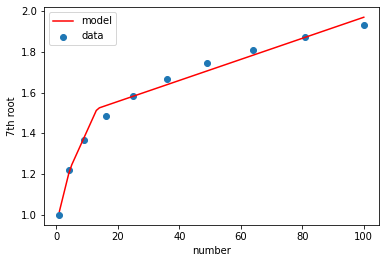

In [6]:
#Problem 5
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Load dataset
#split into input (X) and output (y)
X = np.array([[1], [4], [9], [16], [25], [36], [49], [64], [81], [100]])
X = X*1.0
y = np.array([[1], [1.2190], [1.3687], [1.4860], [1.5838], [1.6685], [1.7436], [1.8114], [1.8734], [1.9307]])
y = y*1.0

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )
    
    
    
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('7th root')
plt.legend()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 6)                 12        
                                                                 
 dense_41 (Dense)            (None, 6)                 42        
                                                                 
 dense_42 (Dense)            (None, 6)                 42        
                                                                 
 dense_43 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 3ms/step
[5.1] => 2.17 (expected 1.40)
[4.9] => 1.70 (expected 1.40)
[4.7] => 1.23 (expected 1.30)
[4.6] => 1.00 (expected 1.50)
[5.0] => 1.94 (e

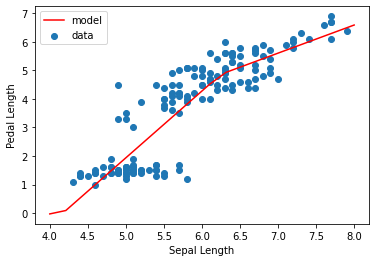

In [16]:
#Problem 6
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np

#Load dataset
#split into input (X) and output (y)
from sklearn import datasets
iris = datasets.load_iris()

X = np.transpose(np.array([iris.data[0:150, 0]])) #sepal length
X = X*1.0
y = np.transpose(np.array([iris.data[0:150, 2]])) #pedal length
y = y*1.0

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 150 cases
for i in range(150):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )
    
    
    
import matplotlib.pyplot as plt
plt.scatter(X,y, label='data')
test_x = np.linspace(4,8,20)
#other test_x = np.array(iris.data[100:150,0]
plt.plot(test_x,model.predict(np.expand_dims(test_x,axis=1)) , color='red', label='model')
plt.xlabel('Sepal Length')
plt.ylabel('Pedal Length')
plt.legend()